## Approach 1

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [66]:
img = cv2.imread("Original.tif",cv2.IMREAD_GRAYSCALE)


In [67]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
t_lo = 136
t_hi = 224

#blured = cv2.pyrMeanShiftFiltering(img, 3, 9)
blured = cv2.bilateralFilter(img, 9, 32, 72)

clahe = cv2.createCLAHE(clipLimit=129.0, tileGridSize=(64, 64))
cl1 = clahe.apply(blured)
cl1 = 255 - cl1

ret, thresh_hi = cv2.threshold(cl1, t_hi, 255, cv2.THRESH_TOZERO)
ret, thresh_lo = cv2.threshold(cl1, t_lo, 255, cv2.THRESH_TOZERO)

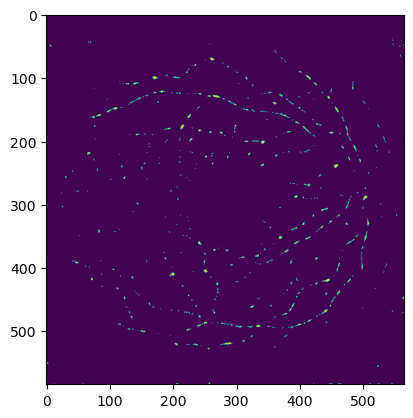

In [83]:
plt.imshow(thresh_hi)

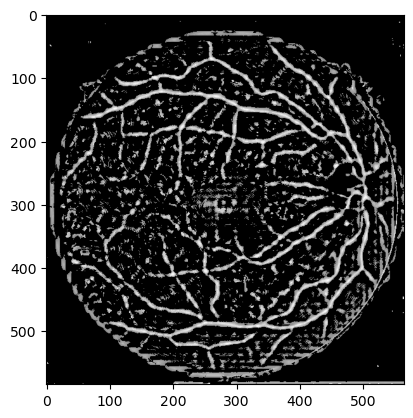

In [85]:
plt.imshow(thresh_lo,cmap='gray')

In [68]:
current = np.copy(thresh_hi)
prev = np.copy(current)
prev[:] = 0
current = cv2.morphologyEx(current, cv2.MORPH_OPEN, kernel5)
iter_num = 0
max_iter = 1000

In [69]:
while np.sum(current - prev) > 0 and iter_num < max_iter:
    iter_num = iter_num+1
    prev = np.copy(current)
    current = cv2.dilate(current, kernel3)
    current[np.where(thresh_lo == 0)] = 0
plt.imshow()

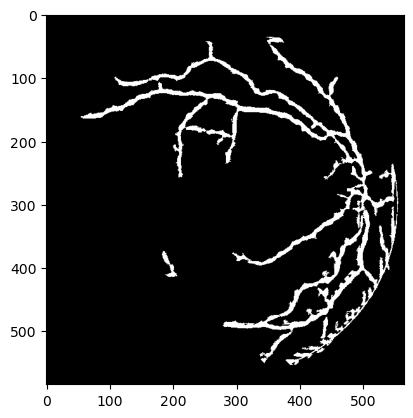

In [70]:
plt.imshow(current,cmap='gray')

In [71]:
contours, hierarchy = cv2.findContours(current, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    area = cv2.contourArea(contour)
    if area < 256:
        cv2.drawContours( current, [contour], 0, [0,0,0], -1 )

In [72]:
opening = cv2.morphologyEx(current, cv2.MORPH_OPEN, kernel7)   
cl1[np.where(opening == 0)] = 0

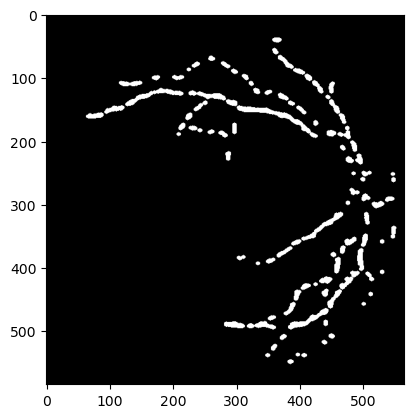

In [73]:
plt.imshow(opening,cmap='gray')

## 2

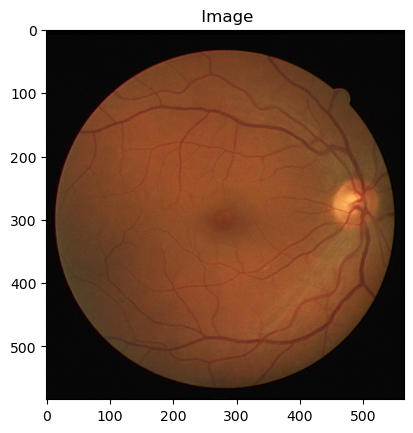

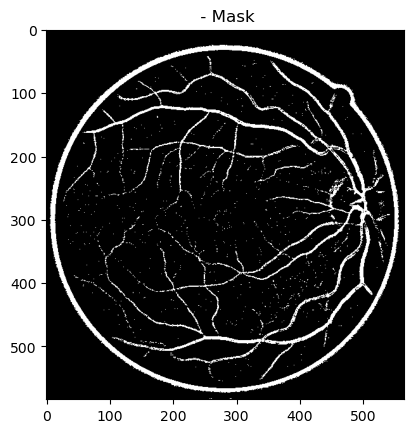

In [74]:
image = cv2.imread("Original.tif")
clr_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.title(" Image")
plt.imshow(clr_image)
plt.show()
mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 35, 6)

plt.title(" - Mask")
plt.imshow(mask, cmap="gray")
plt.show()

In [77]:
def hist_thresholding(image):
    threshold_1 = 125
    threshold_2 = 245

    threshold_image = np.zeros(image.shape)
    threshold_image[(threshold_1 <= image) * (image <= threshold_2)] = 255

    plt.title("Histogram Thresholding")
    plt.imshow(threshold_image, vmin=0, vmax=255, cmap="gray")
    plt.show()

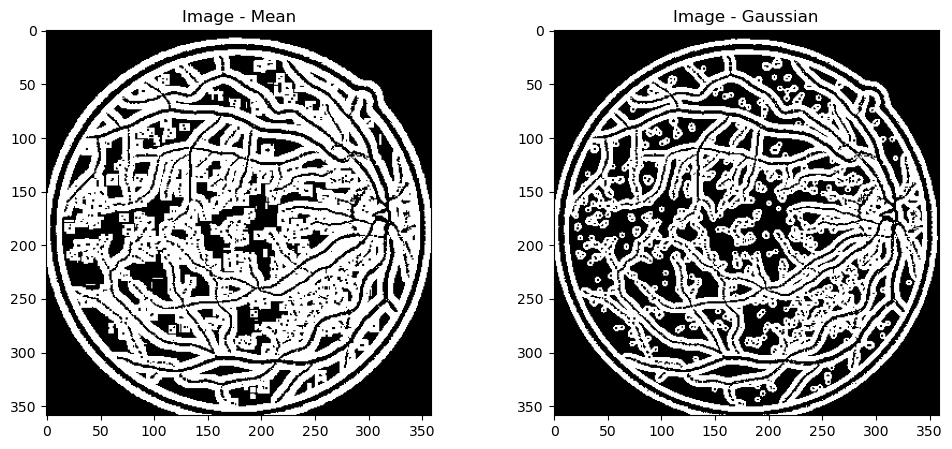

In [78]:
def adapt_thrsholding(image):
    adaptive_thresholding_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    adaptive_thresholding_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title("Image - Mean")
    plt.imshow(adaptive_thresholding_mean, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Image - Gaussian")
    plt.imshow(adaptive_thresholding_gaussian, cmap="gray")

    plt.show()
adapt_thrsholding(image)

In [80]:

def ostu_water(image,img):
    # Thresholding
    ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Noise Removal
    kernel = np.ones((3,3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 3)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.title("Thresholding")
    plt.imshow(thresh, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Noise Removal")
    plt.imshow(opening, cmap="gray")

    plt.show()
    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.title("Foreground")
    plt.imshow(sure_fg, cmap="gray")

    plt.subplot(1, 3, 2)
    plt.title("Background")
    plt.imshow(sure_bg, cmap="gray")

    plt.subplot(1, 3, 3)
    plt.title("Unknown")
    plt.imshow(unknown, cmap="gray")

    plt.show()
    # Connected Components determines the connectivity of blob-like regions in a binary image.
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0

    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255,0,0]

    plt.title("Watershed Algorithm")
    plt.imshow(img)
    plt.show()


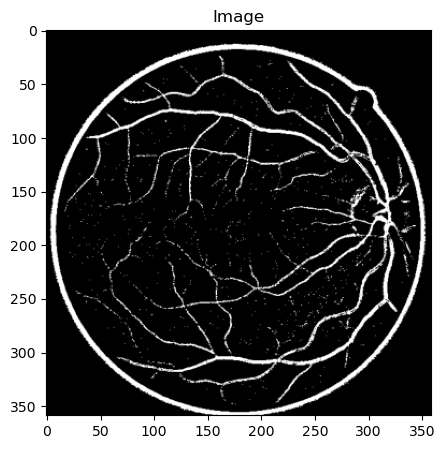

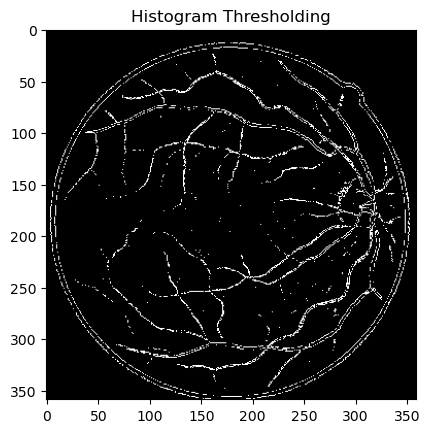

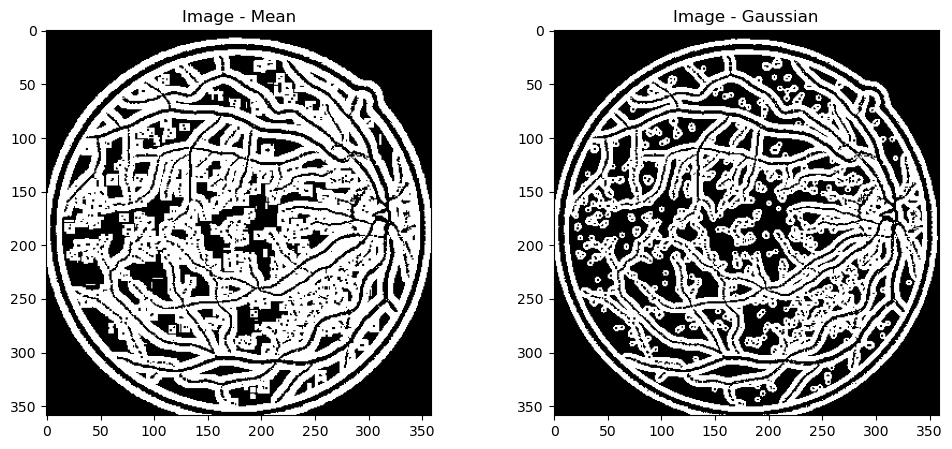

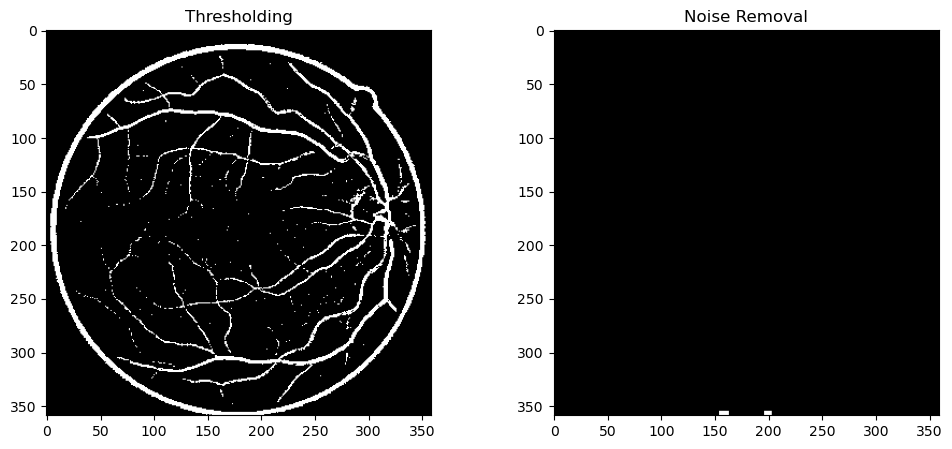

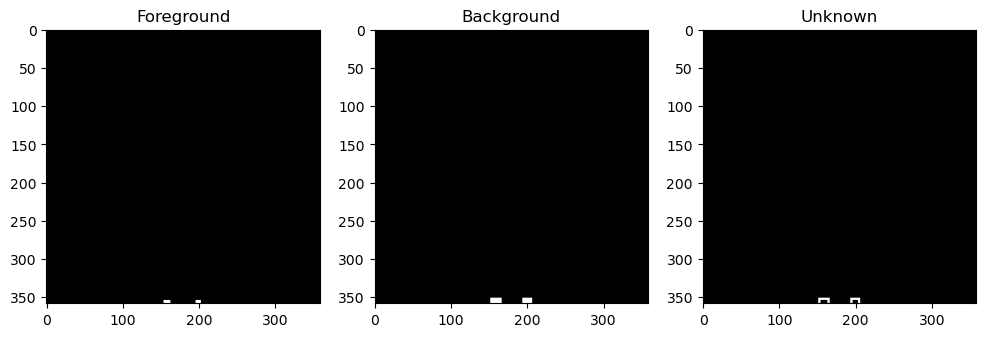

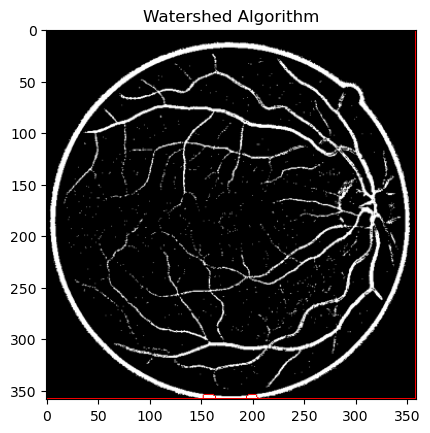

In [81]:
image = cv2.imread("kg.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.imread("kg.png")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(image, cmap="gray")


plt.show()
hist_thresholding(image)
adapt_thrsholding(image)
ostu_water(image,img)

In [82]:
import numpy as np
import cv2
from PIL import Image

# Load image and greyscale it
im = np.array(Image.open("kg.png").convert('L'))

# Normalize and threshold image
im = cv2.normalize(im, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
res, im = cv2.threshold(im, 64, 255, cv2.THRESH_BINARY)

# Fill everything that is the same colour (black) as top-left corner with white
cv2.floodFill(im, None, (0,0), 255)

# Fill everything that is the same colour (white) as top-left corner with black
cv2.floodFill(im, None, (0,0), 0)

# Save result
Image.fromarray(im).save("result.png")


# Approach 3

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [15]:
image = cv2.imread('Original.tif')


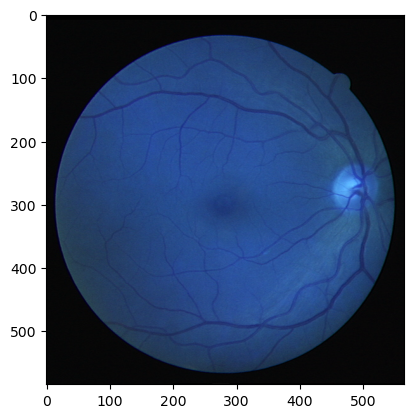

In [16]:
plt.imshow(image,cmap='gray')

In [17]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

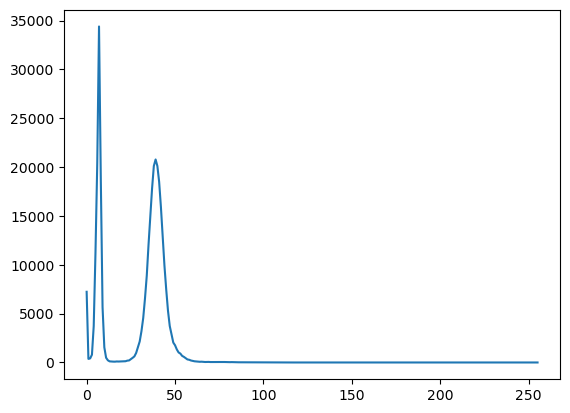

In [18]:
plt.plot(histogram)
plt.show()

In [19]:
a, b, c = cv2.split(image)

### Segmentation by calculating threshold setting 

In [20]:
_, threshold = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

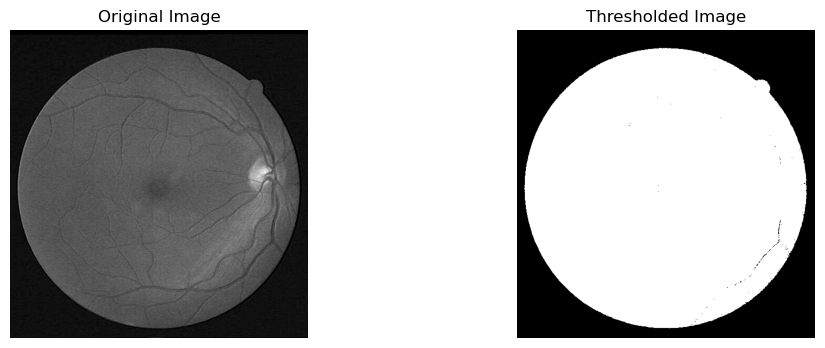

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(threshold, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

### Segmentation using Adaptive Thresholding

In [22]:
adaptive_thresholded_image_gau = cv2.adaptiveThreshold(a, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [23]:
adaptive_thresholded_image_mean = cv2.adaptiveThreshold(a, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

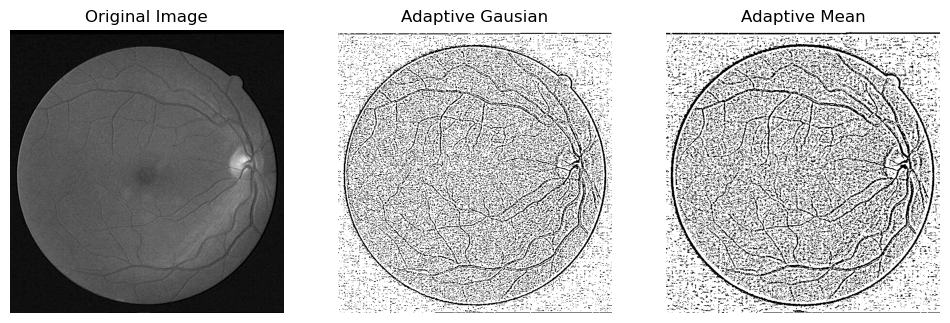

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(a, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adaptive_thresholded_image_gau, cmap='gray')
plt.title('Adaptive Gausian')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresholded_image_mean, cmap='gray')
plt.title('Adaptive Mean')
plt.axis('off')

plt.show()

### Image Segmentation using Watershed Algorithm

In [25]:
_, thresh = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [26]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

In [27]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [28]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
_, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [29]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [30]:
_, markers = cv2.connectedComponents(sure_fg)

In [31]:
markers = markers+1

In [32]:
markers[unknown==255] = 0

In [33]:
img = cv2.imread("Original.tif")
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

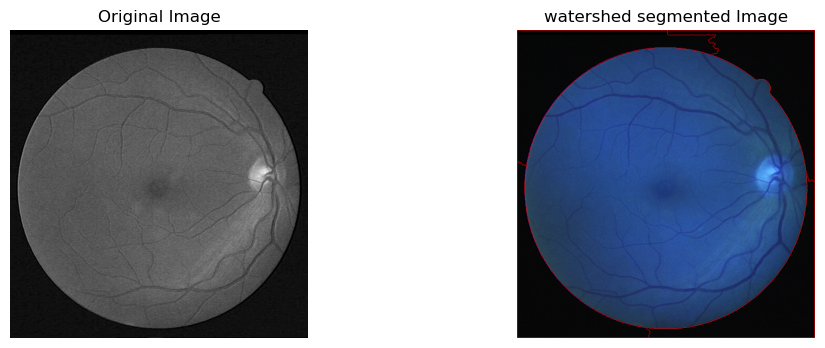

In [34]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(a, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('watershed segmented Image')
plt.axis('off')

plt.show()

### Morphological Transform

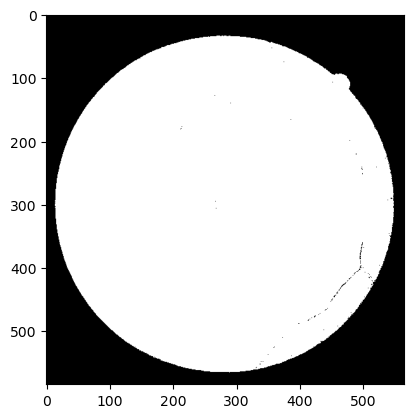

In [35]:
plt.imshow(threshold,cmap='gray')

In [36]:
circular_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
square_kernel = np.ones((5, 5), np.uint8)
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

In [37]:
circular_kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [38]:
square_kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [39]:
cross_kernel

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### erosion and dilation with a circular structuring element

In [40]:
cirr_eroded = cv2.erode(threshold, circular_kernel, iterations=1)
cirr_dilated = cv2.dilate(threshold, circular_kernel, iterations=1)

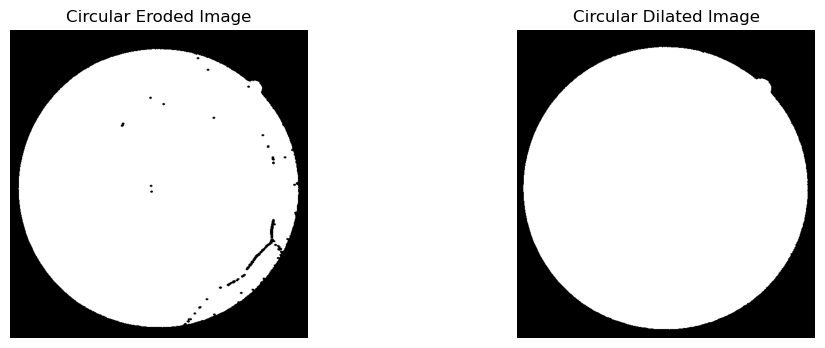

In [41]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(cirr_eroded, cmap='gray')
plt.title('Circular Eroded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cirr_dilated, cmap='gray')
plt.title('Circular Dilated Image')
plt.axis('off')

plt.show()

### erosion and dilation with a square structuring element

In [42]:
square_erd = cv2.erode(threshold, square_kernel, iterations=1)
square_did = cv2.dilate(threshold, square_kernel, iterations=1)

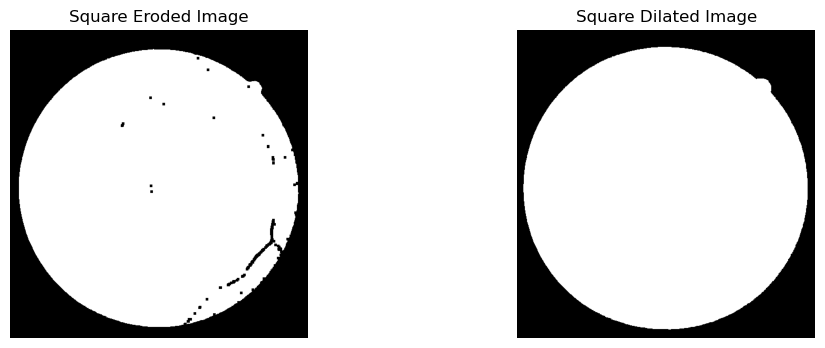

In [43]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(square_erd, cmap='gray')
plt.title('Square Eroded Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(square_did, cmap='gray')
plt.title('Square Dilated Image')
plt.axis('off')

plt.show()

### closing and opening with a cross shaped structuring element

In [44]:
cross_closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, cross_kernel)
cross_opened = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, cross_kernel)

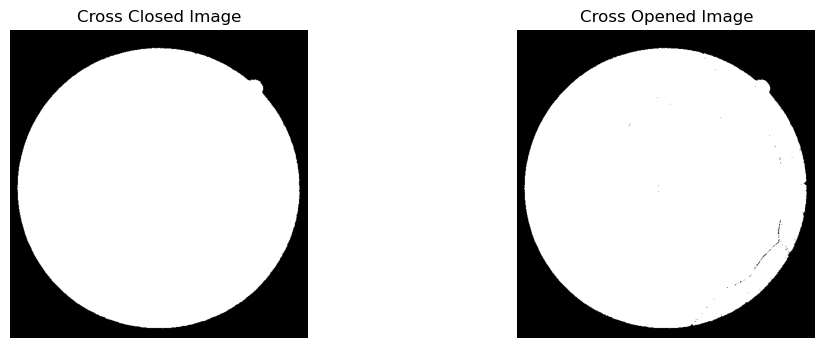

In [45]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(cross_closed, cmap='gray')
plt.title('Cross Closed Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cross_opened, cmap='gray')
plt.title('Cross Opened Image')
plt.axis('off')

plt.show()

### Mask of the Veins

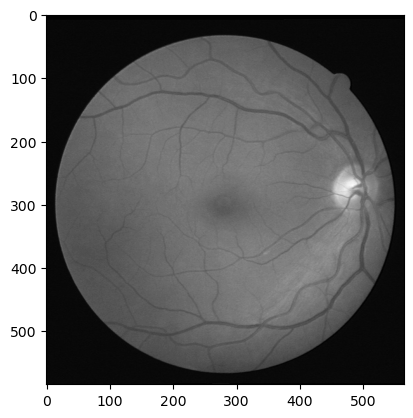

In [46]:
image = cv2.imread('Original.tif',0)
plt.imshow(image,cmap='gray')

In [62]:
def generate_vein_mask(image_path, threshold=88):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    binary_image = cv2.bitwise_not(binary_image)

    return binary_image

In [63]:
image_path = "Original.tif"
vein_mask = generate_vein_mask(image_path)

# Approach 2 

In [ ]:
image = cv2.imread('Original.tif')

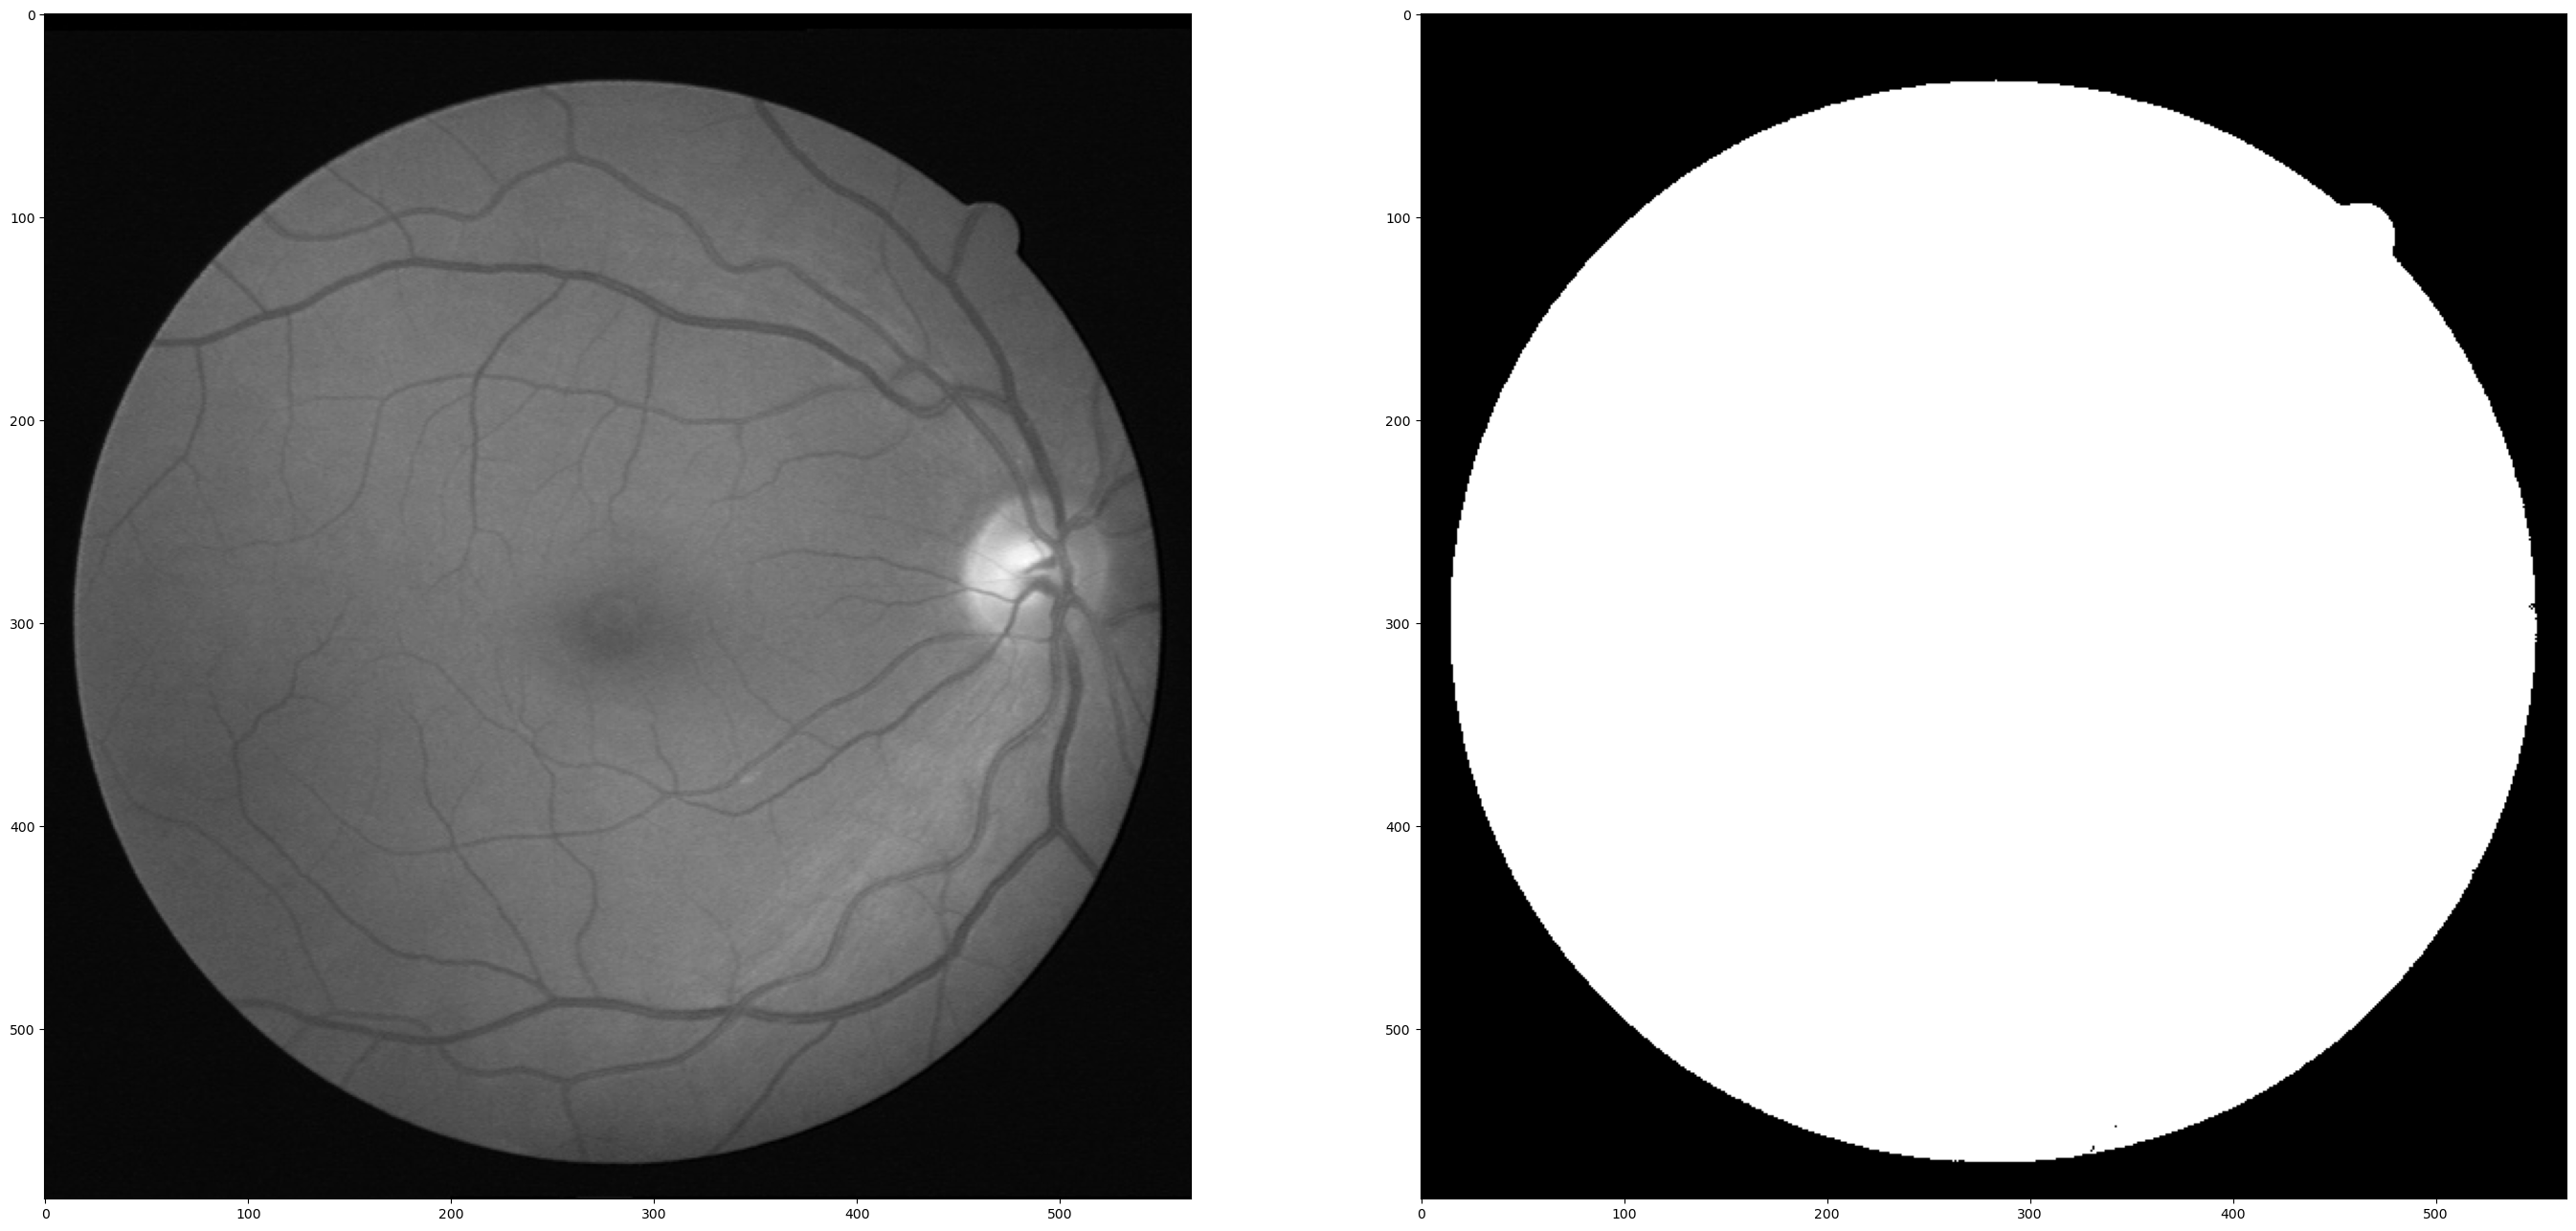

In [4]:
def segment_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate histogram
    hist = cv2.calcHist([image], [0], None, [256], [0,256])
    
    # Find the threshold using Otsu's method
    _, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    plt.figure(figsize=(34, 24))
    plt.subplot(1,2, 1)
    plt.imshow(image, cmap='gray')
    plt.subplot(1,2, 2)
    plt.imshow(thresholded_image, cmap='gray')

segment_image('Original.tif')

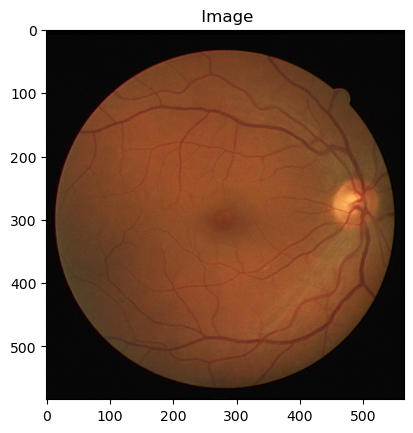

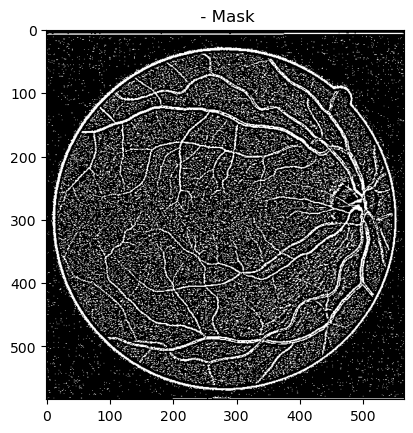

In [13]:
image = cv2.imread("Original.tif")
clr_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.title(" Image")
plt.imshow(clr_image)
plt.show()
mask = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.title(" - Mask")
plt.imshow(mask, cmap="gray")
plt.show()